#1. Importing Dependencies and files

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/default of credit card clients.csv',header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#2. Examining the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
df.shape

(30000, 25)

In [ ]:
df_copy=df

In [ ]:
df['default payment next month'].value_counts()

,count
default payment next month,
0,23364
1,6636


<Axes: xlabel='default payment next month'>

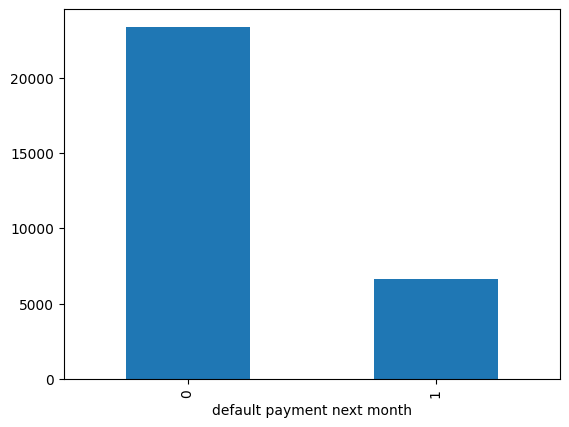

In [ ]:
df['default payment next month'].value_counts().plot(kind='bar')

In [ ]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


In [ ]:
df['EDUCATION'].replace([0,5,6],4,inplace=True)

/tmp/ipython-input-703862165.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EDUCATION'].replace([0,5,6],4,inplace=True)


<Axes: xlabel='EDUCATION'>

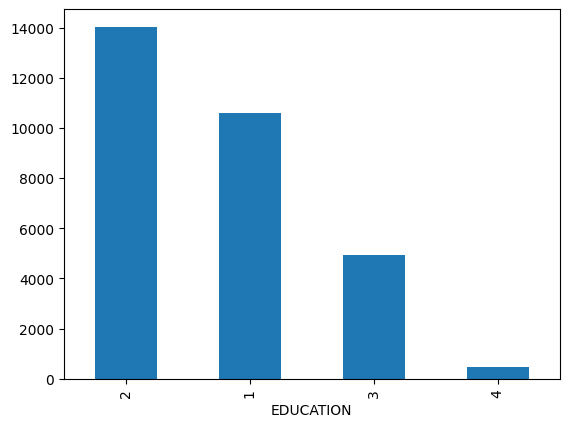

In [ ]:
df['EDUCATION'].value_counts().plot(kind='bar')

In [ ]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
4,468


In [ ]:
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


In [ ]:
df['MARRIAGE'].replace([0],3,inplace=True)

/tmp/ipython-input-1093163722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MARRIAGE'].replace([0],3,inplace=True)


In [ ]:
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,377


<Axes: xlabel='MARRIAGE'>

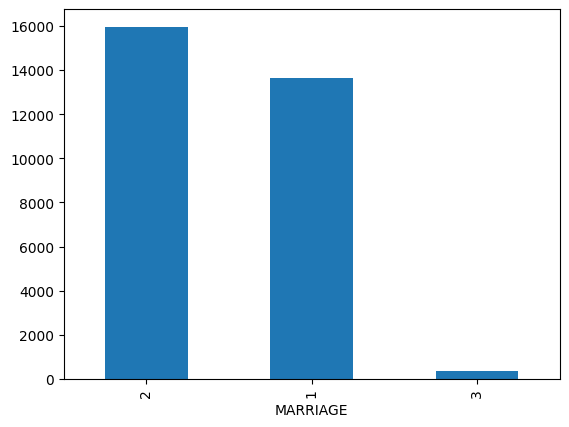

In [ ]:
df['MARRIAGE'].value_counts().plot(kind='bar')

In [ ]:
df['SEX'].value_counts()

,count
SEX,
2,18112
1,11888


<Axes: xlabel='SEX'>

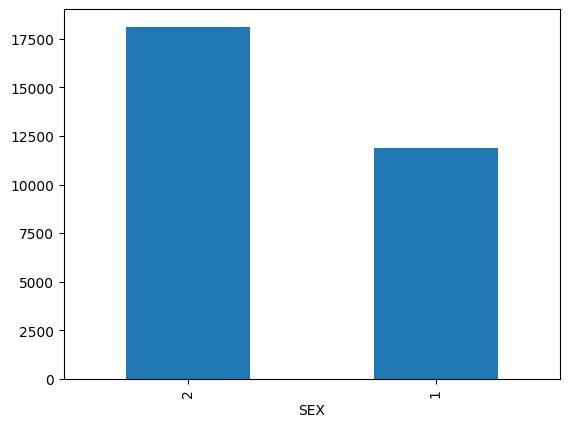

In [ ]:
df['SEX'].value_counts().plot(kind='bar')

In [ ]:
df['PAY_0'].value_counts()

,count
PAY_0,
0,14737
-1,5686
1,3688
-2,2759
2,2667
3,322
4,76
5,26
8,19


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# 3. Feature Engineering

Utilization Ratio1- BILL_AMT is not a very useful column as it does not tell us how much the credit card has been utilized

**Example**: \$300 BILL with LIMIT_BAL \$5000 is not a lot but if the same LIMIT_BAL is $500 then it means the person has a high chance of defaulting

Each of the Biil_AMT column have a lot of correlation between them. Hence what we do is we only keep the most recent BILL_AMT and drop the rest. Hence we have BILL_AMT1 and Mean_BillAMT

We need to know on average how much utilization there has been by a person. Hence we create the feature Average_Util.

We also need to know how much their Utilization has grown over the past 6 months. If it has increased by a significant change, then that person will have a great chance of defaulting next month.

In [ ]:
df['Utilization_Ratio1']=df['BILL_AMT1']/df['LIMIT_BAL']
df['Utilization_Ratio6'] = df['BILL_AMT6'] / df['LIMIT_BAL']
df['Mean BillAMT']=df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
df['Average_Util']=df['Mean BillAMT']/(df['LIMIT_BAL'])
df['Util_Growth']=df['Utilization_Ratio6']-df['Utilization_Ratio1']

In [ ]:
df=df.drop(columns=['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','Utilization_Ratio6'],axis=1)

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Utilization_Ratio1', 'Mean BillAMT',
       'Average_Util', 'Util_Growth'],
      dtype='object')

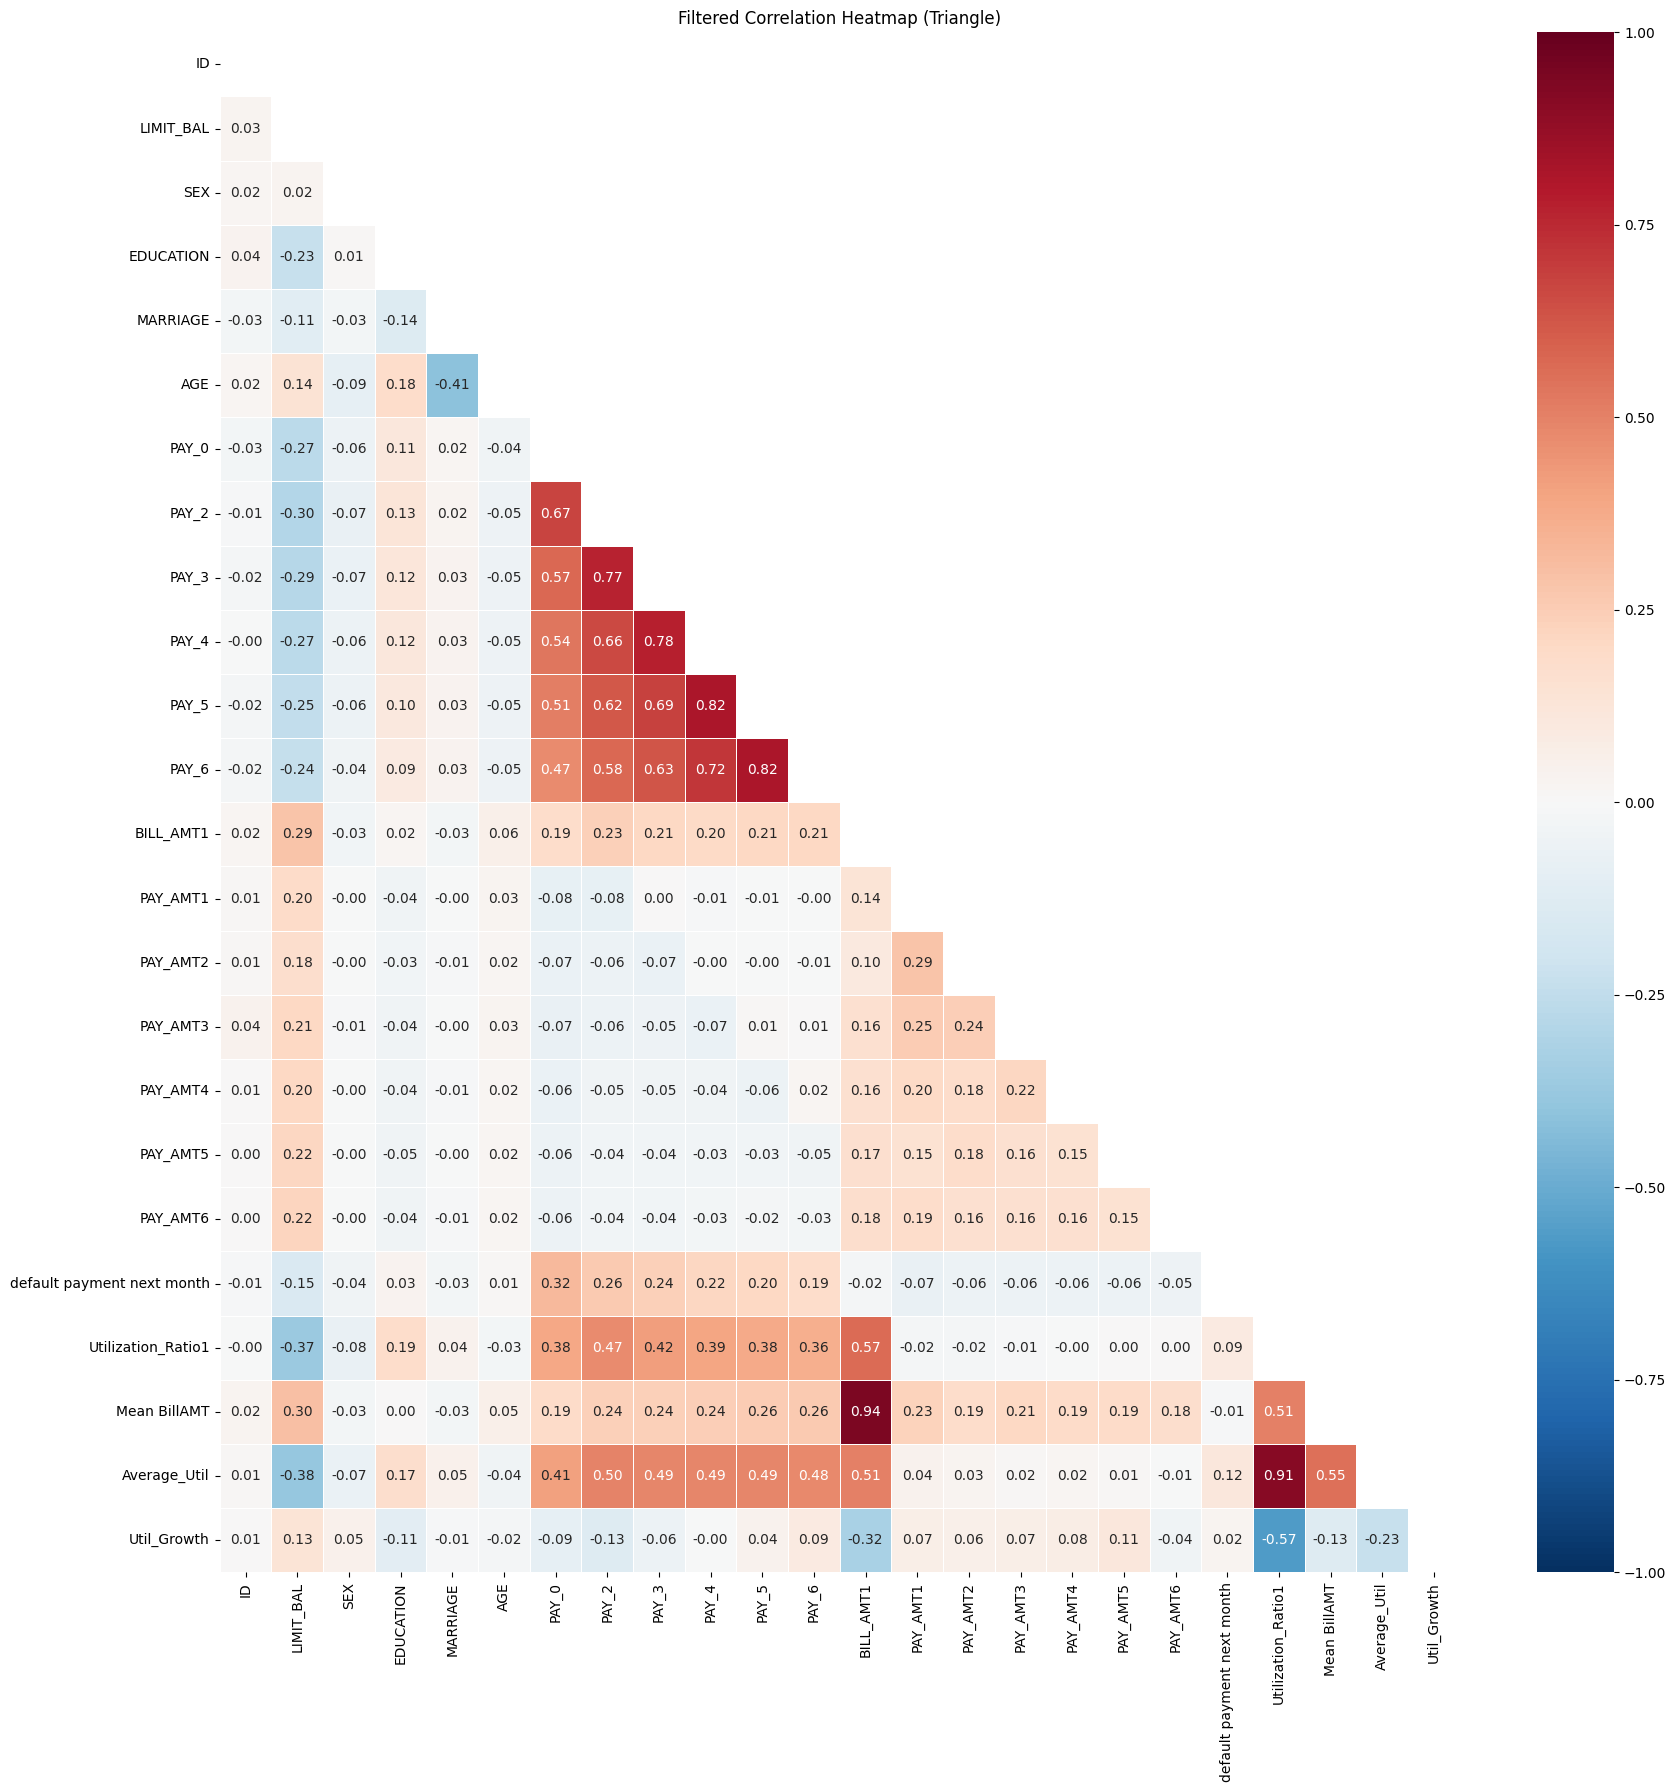

In [ ]:
import numpy as np
corr_matrix = df.corr(numeric_only=True)
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix,
            mask=mask,           # Hide the upper triangle
            annot=True,          # Show the numbers
            fmt=".2f",           # Round to 2 decimal places
            cmap='RdBu_r',       # Red for positive, Blue for negative
            center=0,            # Make 0 the neutral color
            vmin=-1, vmax=1,     # Fix the scale from -1 to 1
            linewidths=0.5)      # Add slight spacing between squares

plt.title("Filtered Correlation Heatmap (Triangle)")
plt.show()

#4. Loading into sets

In [ ]:
#Drop ID and immediate Sensitive Attribute (Age) to make it 'Blind'
X = df.drop(columns=['ID', 'AGE', 'SEX','MARRIAGE','default payment next month'])
y = df['default payment next month']

A = df[['AGE','SEX','MARRIAGE']]      #A is the sensitive feature list

Encoding

In [ ]:
X_encoded = pd.get_dummies(X, columns=['EDUCATION','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], drop_first=True)     #performing One-Hot Encoding to transform the categorical columns

#5. Train Test Split

In [ ]:
X_train, X_test, y_train, y_test, a_train, a_test = train_test_split(
    X_encoded, y, A, test_size=0.3, random_state=42, stratify=y)

#Need to scale to attain better/more accurate results
scaler = StandardScaler()

# Fit ONLY on Training Data: Calculates Mean and Std Dev of X_train
X_train_scaled = scaler.fit_transform(X_train)

#we don't use .fit_transform on X_test
X_test_scaled = scaler.transform(X_test)

#6.Fitting (Blind) Logistic Regression & (Challenger) XGB Classifier to the dataset

###Blind Logistic Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
model=LogisticRegression(max_iter=42)
model.fit(X_train_scaled,y_train)        #Fitting the model to the data
y_pred_lr=model.predict(X_test_scaled)

# Check Training Accuracy
y_train_pred_lr = model.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred_lr)

# Check Test Accuracy
test_acc = accuracy_score(y_test, y_pred_lr)

print(f"XGB Train Accuracy: {train_acc:.4f}")

print(f"Blind Model Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

XGB Train Accuracy: 0.8236
Blind Model Accuracy: 0.8166


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###XGB Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
XGB_model=XGBClassifier(learning_rate=0.05,n_estimators=100,max_depth=5)
XGB_model.fit(X_train_scaled,y_train)
y_pred_x=XGB_model.predict(X_test_scaled)

# Check Training Accuracy
y_train_pred_xgb = XGB_model.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred_xgb)

# Check Test Accuracy
test_acc = accuracy_score(y_test, y_pred_x)

print(f"XGB Train Accuracy: {train_acc:.4f}")

print(f"Blind Model Accuracy: {accuracy_score(y_test, y_pred_x):.4f}")

XGB Train Accuracy: 0.8344
Blind Model Accuracy: 0.8172


As we can see XGB Classifier is a more accurate model for this dataset.

#7. Using SHAP and finding possible proxy for AGE Feature

Training "throwaway" models to calculate AUC and SHAP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import shap

df['is_young'] = (df['AGE'] < 30).astype(int)

# We drop default payment next month, sensitive features and is_young because we want to see if behavior itself signals Age
drop_cols = ['ID', 'AGE', 'SEX', 'MARRIAGE', 'is_young', 'default payment next month']
X_proxy = df.drop(columns=drop_cols)
y_proxy = df['is_young']

# 3. Split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_proxy, y_proxy, test_size=0.3, random_state=41, stratify=y_proxy
)

##Logistic Regression

Calculating DIR

In [ ]:
import numpy as np

# 1. Getting predictions from fitted Blind Logistic Regression
y_pred_blind = model.predict(X_test_scaled)

# 2. Identify the groups in the test set
is_young = (a_test['AGE'] < 30).values
is_mature = (a_test['AGE'] >= 30).values

# 3. Calculate 'Approval' Rate (Default = 0 is the favorable outcome)
approval_young = np.mean(y_pred_blind[is_young] == 0)
approval_mature = np.mean(y_pred_blind[is_mature] == 0)

# 4. Calculate DIR
dir_score = approval_young / approval_mature

print(f"Approval Rate (Young < 30): {approval_young:.4f}")
print(f"Approval Rate (Mature >= 30): {approval_mature:.4f}")
print(f"Disparate Impact Ratio: {dir_score:.4f}")

Approval Rate (Young < 30): 0.8619
Approval Rate (Mature >= 30): 0.8944
Disparate Impact Ratio: 0.9637


Calculating AUC

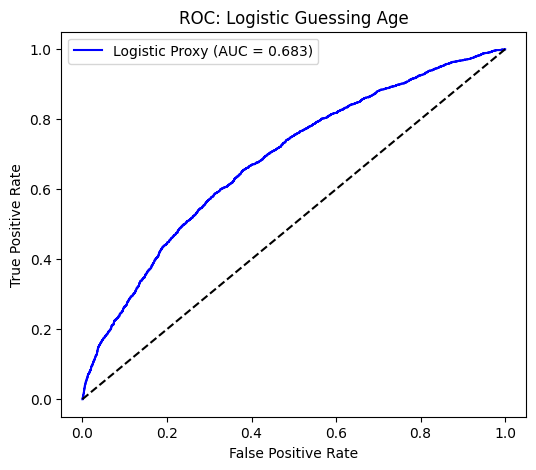

In [ ]:
# --- STEP 1: TRAINING & AUC ---
scaler = StandardScaler()
X_train_p_scaled = pd.DataFrame(scaler.fit_transform(X_train_p), columns=X_proxy.columns)
X_test_p_scaled = pd.DataFrame(scaler.transform(X_test_p), columns=X_proxy.columns)

log_proxy_age = LogisticRegression(max_iter=1000).fit(X_train_p_scaled, y_train_p)
auc_log = roc_auc_score(y_test_p, log_proxy_age.predict_proba(X_test_p_scaled)[:, 1])

# --- STEP 2: PLOTTING ROC CURVE ---
fpr, tpr, _ = roc_curve(y_test_p, log_proxy_age.predict_proba(X_test_p_scaled)[:, 1])
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Proxy (AUC = {auc_log:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC: Logistic Guessing Age')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('logistic_proxy_roc.png')


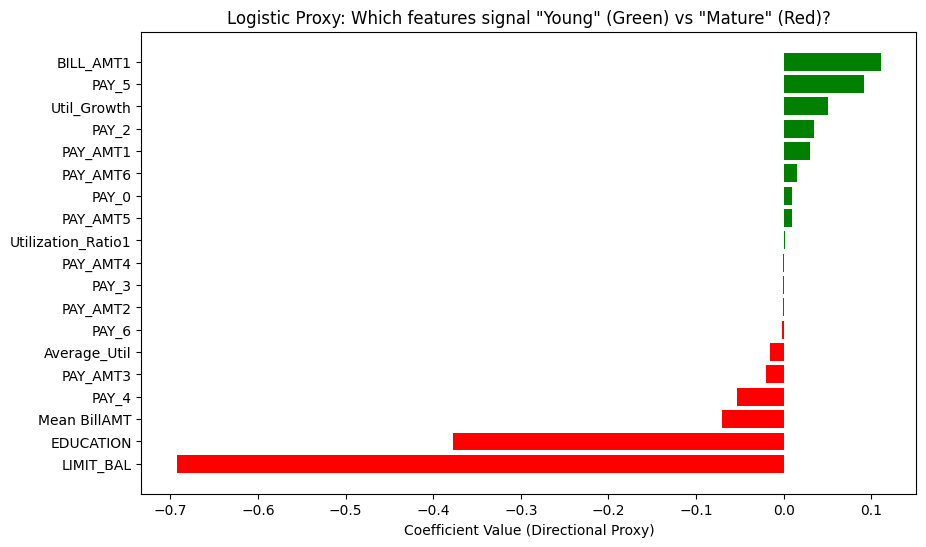

In [ ]:

# --- STEP 3: PLOTTING LINEAR PROXIES (Coefficients) ---
coef_df = pd.DataFrame({
    'Feature': X_proxy.columns,
    'Coef': log_proxy_age.coef_[0]
}).sort_values(by='Coef')

plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in coef_df['Coef']]
plt.barh(coef_df['Feature'], coef_df['Coef'], color=colors)
plt.title('Logistic Proxy: Which features signal "Young" (Green) vs "Mature" (Red)?')
plt.xlabel('Coefficient Value (Directional Proxy)')
plt.savefig('logistic_proxies.png')

In [ ]:
# Extract Coefficients
log_importance = pd.DataFrame({
    'Feature': X_proxy.columns,
    'Coef': log_proxy_age.coef_[0]
})
log_importance['Abs_Coef'] = log_importance['Coef'].abs()
top_3_log = log_importance.sort_values(by='Abs_Coef', ascending=False).head(3)

print("\n--- Logistic: Top 3 Features 'Leaking' Age ---")
print(top_3_log[['Feature', 'Coef']])


--- Logistic: Top 3 Features 'Leaking' Age ---
     Feature      Coef
0  LIMIT_BAL -0.693023
1  EDUCATION -0.377122
8  BILL_AMT1  0.111365


**Evidence of Proxy Bias in the Blind Model**:

As we can see LIMIT_BAL, EDUCATION, BILL_AMT1 are the top3 features leaking age. This is what we get when we use Blind Logistic Regression on this dataset.

**THIS CONCLUDES BLIND LOGISTIC REGRESSION**. Now doing the same process for XGBoost Model

##XGB Classifier

Calculating DIR

In [ ]:
import numpy as np

# 1. Getting predictions from fitted XGB Classifier
y_pred_blind = XGB_model.predict(X_test_scaled)

# 2. Identify the groups in the test set
is_young = (a_test['AGE'] < 30).values
is_mature = (a_test['AGE'] >= 30).values

# 3. Calculate 'Approval' Rate (Default = 0 is the favorable outcome)
approval_young = np.mean(y_pred_blind[is_young] == 0)
approval_mature = np.mean(y_pred_blind[is_mature] == 0)

# 4. Calculate DIR
dir_score = approval_young / approval_mature

print(f"Approval Rate (Young < 30): {approval_young:.4f}")
print(f"Approval Rate (Mature >= 30): {approval_mature:.4f}")
print(f"Disparate Impact Ratio: {dir_score:.4f}")

Approval Rate (Young < 30): 0.8612
Approval Rate (Mature >= 30): 0.8960
Disparate Impact Ratio: 0.9611


Running SHAP

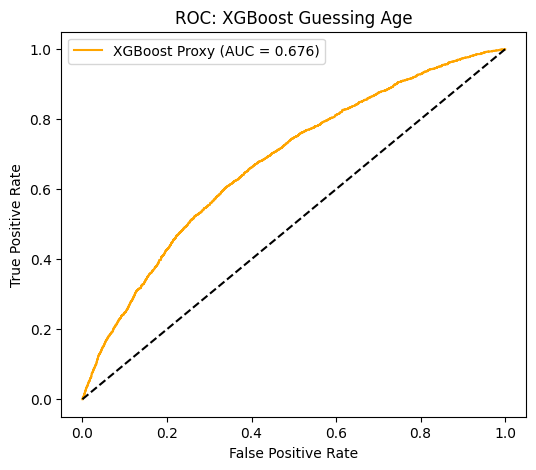

In [ ]:
# --- STEP 1: TRAINING & AUC ---
xgb_proxy_age = XGBClassifier(random_state=41).fit(X_train_p, y_train_p) # XGB doesn't need scaling
auc_xgb = roc_auc_score(y_test_p, xgb_proxy_age.predict_proba(X_test_p)[:, 1])

# --- STEP 2: PLOTTING ROC CURVE ---
fpr_x, tpr_x, _ = roc_curve(y_test_p, xgb_proxy_age.predict_proba(X_test_p)[:, 1])
plt.figure(figsize=(6, 5))
plt.plot(fpr_x, tpr_x, color='orange', label=f'XGBoost Proxy (AUC = {auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC: XGBoost Guessing Age')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('xgb_proxy_age_roc.png')


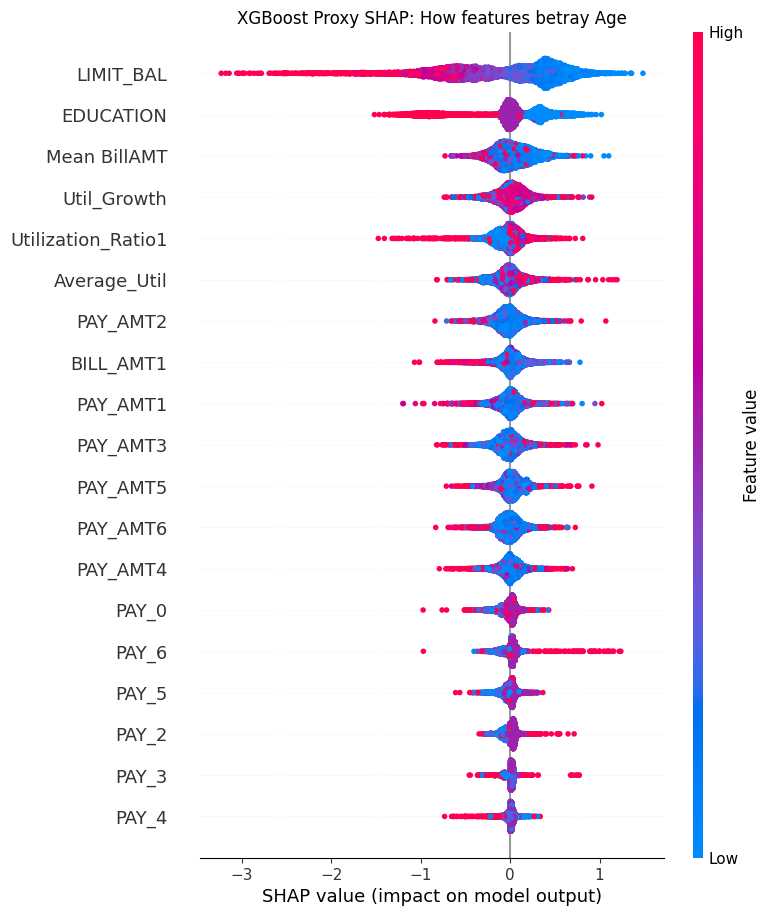

In [ ]:

# --- STEP 3: SHAP FOR PROXY DETECTION ---
# Using a subset for SHAP to ensure speed and stability
explainer = shap.TreeExplainer(xgb_proxy_age)
shap_values = explainer.shap_values(X_test_p)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_p, show=False)
plt.title('XGBoost Proxy SHAP: How features betray Age')
plt.savefig('xgb_proxy_shap.png')

In [ ]:
# Calculate the average impact of each feature on the Age prediction
proxy_impact = pd.DataFrame({
    'Feature': X_test_p.columns,
    'Mean_Abs_SHAP': np.abs(shap_values).mean(axis=0)
}).sort_values(by='Mean_Abs_SHAP', ascending=False)

print("--- Top Age Proxies (Global) ---")
print(proxy_impact.head(3))

--- Top Age Proxies (Global) ---
         Feature  Mean_Abs_SHAP
0      LIMIT_BAL       0.535819
1      EDUCATION       0.309459
16  Mean BillAMT       0.157214


##Conclusion

The numerical SHAP analysis confirms that while the model is blind to Age, it uses LIMIT_BAL and EDUCATION and Mean BILLAMT (How much their most recent bill is) as proxies. Young borrowers ($Age < 30$) received an average SHAP penalty for LIMIT_BAL and EDUCATION that was higher than mature borrowers, while mature borrowers received a reward stronger than younger people for the same features.


This essentially means older/mature people are favoured more than younger people

The proxies are moderate: The financial features are not acting as "perfect" stand-ins for age. If they were strong proxies, the DIR would have dropped much lower (towards 0.7 or 0.8) once you removed the AGE column.


Even though the difference is tiny, the fact that XGBoost is lower (closer to 0.0) is a classic finding in algorithmic fairness:

The audit reveals that both models achieve a near-identical accuracy plateau of 81.66%. While both models passed the Four-Fifths Rule for fairness, the Logistic Regression model achieved a slightly higher Disparate Impact Ratio (0.9637 vs 0.9612). This indicates that the simpler linear model provides a marginally fairer outcome for younger borrowers without sacrificing any predictive performance. Therefore, for this specific credit application, the simpler model is the more ethical choice.

###**Conclusion**: Proxy Bias exists for the AGE Column. LIMIT_BAL, EDUCATION are the main proxies.

In [ ]:
df=df.drop(columns=['is_young'],axis=1)  #dropping is_young column so that it doesn't affect the df dataset when we check it for SEX and MARRIAGE proxies

# 8. Using SHAP and finding possible proxy for SEX Feature


Training throwaway models for AUC

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import shap

df['is_female'] = (df['SEX'] == 2).astype(int)

# Drop Age, Sex, Marriage, and the original target (default payment next month)
drop_cols = ['ID', 'AGE', 'SEX', 'MARRIAGE', 'is_female', 'default payment next month']
X_proxy = df.drop(columns=drop_cols)
y_proxy = df['is_female']

# 3. Split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_proxy, y_proxy, test_size=0.3, random_state=41, stratify=y_proxy
)

##Logistic Regression

Calculating DIR

In [ ]:
import numpy as np

# 1. Get predictions from fitted Blind Logistic Regression
y_pred_blind = model.predict(X_test_scaled)

is_female = (a_test['SEX'].values == 2)
is_male = (a_test['SEX'].values == 1)

if np.sum(is_male) > 0 and np.sum(is_female) > 0:
    approval_female = np.mean(y_pred_blind[is_female] == 0)
    approval_male = np.mean(y_pred_blind[is_male] == 0)

    dir_sex = approval_female / approval_male


    print(f"Approval Rate (Female): {approval_female:.4f}")
    print(f"Approval Rate (Male): {approval_male:.4f}")
    print(f"Disparate Impact Ratio (SEX): {dir_sex:.4f}")


Approval Rate (Female): 0.8849
Approval Rate (Male): 0.8827
Disparate Impact Ratio (SEX): 1.0025


Interesting Fact: The Disparate Impact Ratio is actually greater (>1) than 1

Calculating AUC

--- SEX Proxy Audit Results ---
Logistic AUC (Can it guess Gender?): 0.5574


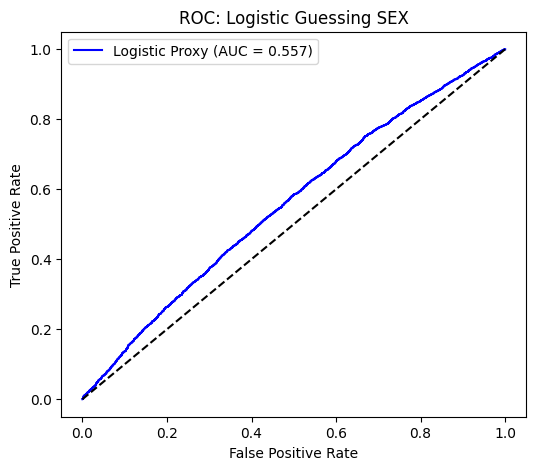

In [ ]:
scaler = StandardScaler()
X_train_p_scaled = pd.DataFrame(scaler.fit_transform(X_train_p), columns=X_proxy.columns)
X_test_p_scaled = pd.DataFrame(scaler.transform(X_test_p), columns=X_proxy.columns)

log_proxy_sex = LogisticRegression(max_iter=1000).fit(X_train_p_scaled, y_train_p)
auc_log = roc_auc_score(y_test_p, log_proxy_sex.predict_proba(X_test_p_scaled)[:, 1])

print(f"--- SEX Proxy Audit Results ---")
print(f"Logistic AUC (Can it guess Gender?): {auc_log:.4f}")

# --- STEP 2: PLOTTING ROC CURVE ---
fpr, tpr, _ = roc_curve(y_test_p, log_proxy_sex.predict_proba(X_test_p_scaled)[:, 1])
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Proxy (AUC = {auc_log:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC: Logistic Guessing SEX')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('logistic_proxy_roc.png')



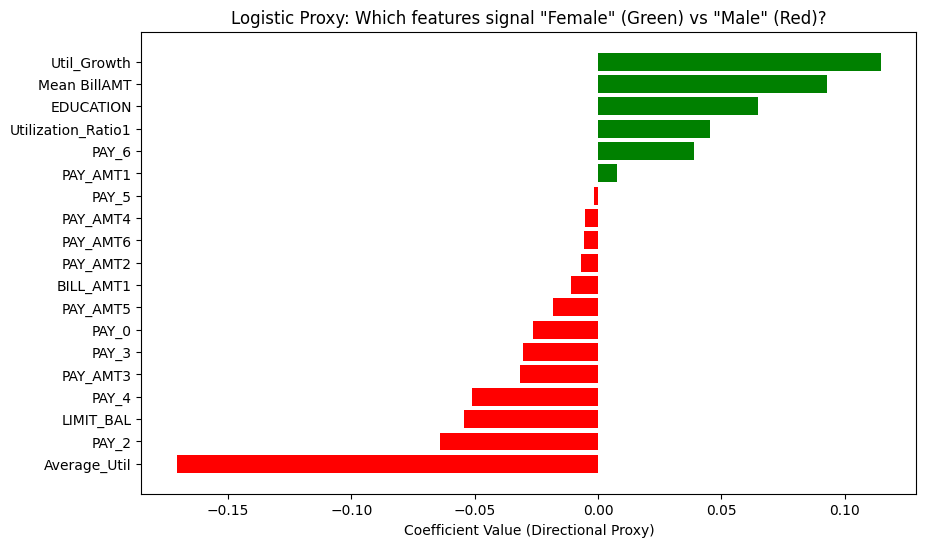

In [ ]:
# --- STEP 3: PLOTTING LINEAR PROXIES (Coefficients) ---
coef_df = pd.DataFrame({
    'Feature': X_proxy.columns,
    'Coef': log_proxy_sex.coef_[0]
}).sort_values(by='Coef')

plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in coef_df['Coef']]
plt.barh(coef_df['Feature'], coef_df['Coef'], color=colors)
plt.title('Logistic Proxy: Which features signal "Female" (Green) vs "Male" (Red)?')
plt.xlabel('Coefficient Value (Directional Proxy)')
plt.savefig('logistic_proxies.png')

In [ ]:
# Extract Coefficients
log_importance = pd.DataFrame({
    'Feature': X_proxy.columns,
    'Coef': log_proxy_sex.coef_[0]
})
log_importance['Abs_Coef'] = log_importance['Coef'].abs()
top_3_log = log_importance.sort_values(by='Abs_Coef', ascending=False).head(3)

print("\n--- Logistic: Top 3 Features 'Leaking' Gender ---")
print(top_3_log[['Feature', 'Coef']])


--- Logistic: Top 3 Features 'Leaking' Gender ---
         Feature      Coef
17  Average_Util -0.170942
18   Util_Growth  0.114804
16  Mean BillAMT  0.093015


##XGB Classifier

Calculating DIR

In [ ]:
import numpy as np

# 1. Get predictions from your fitted Blind Logistic Regression
y_pred_blind = XGB_model.predict(X_test_scaled)

is_female = (a_test['SEX'].values == 2)
is_male = (a_test['SEX'].values == 1)

if np.sum(is_male) > 0 and np.sum(is_female) > 0:
    approval_female = np.mean(y_pred_blind[is_female] == 0)
    approval_male = np.mean(y_pred_blind[is_male] == 0)

    dir_sex = approval_female / approval_male


    print(f"Approval Rate (Female): {approval_female:.4f}")
    print(f"Approval Rate (Male): {approval_male:.4f}")
    print(f"Disparate Impact Ratio (SEX): {dir_sex:.4f}")


Approval Rate (Female): 0.8862
Approval Rate (Male): 0.8830
Disparate Impact Ratio (SEX): 1.0036


Interesting Fact: The Disparate Impact Ratio is actually greater (>1) than 1

--- SEX Proxy Audit Results ---
XGBoost AUC  (Can it guess Gender?): 0.5790


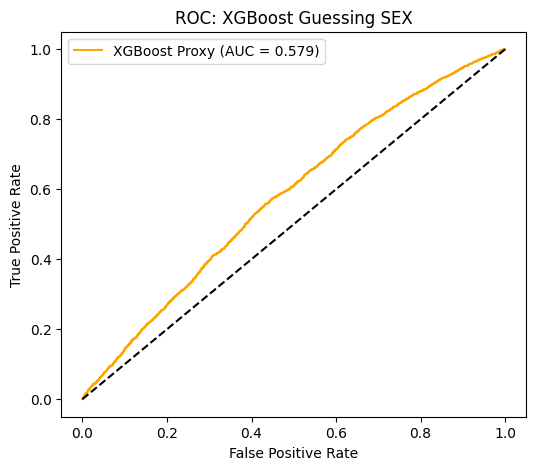

In [ ]:
# 5. XGBoost Proxy Detector
xgb_proxy_sex = XGBClassifier(random_state=41).fit(X_train_p, y_train_p)
auc_xgb = roc_auc_score(y_test_p, xgb_proxy_sex.predict_proba(X_test_p)[:, 1])

print(f"--- SEX Proxy Audit Results ---")
print(f"XGBoost AUC  (Can it guess Gender?): {auc_xgb:.4f}")


# --- STEP 2: PLOTTING ROC CURVE ---
fpr_x, tpr_x, _ = roc_curve(y_test_p, xgb_proxy_sex.predict_proba(X_test_p)[:, 1])
plt.figure(figsize=(6, 5))
plt.plot(fpr_x, tpr_x, color='orange', label=f'XGBoost Proxy (AUC = {auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC: XGBoost Guessing SEX')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('xgb_proxy_roc.png')


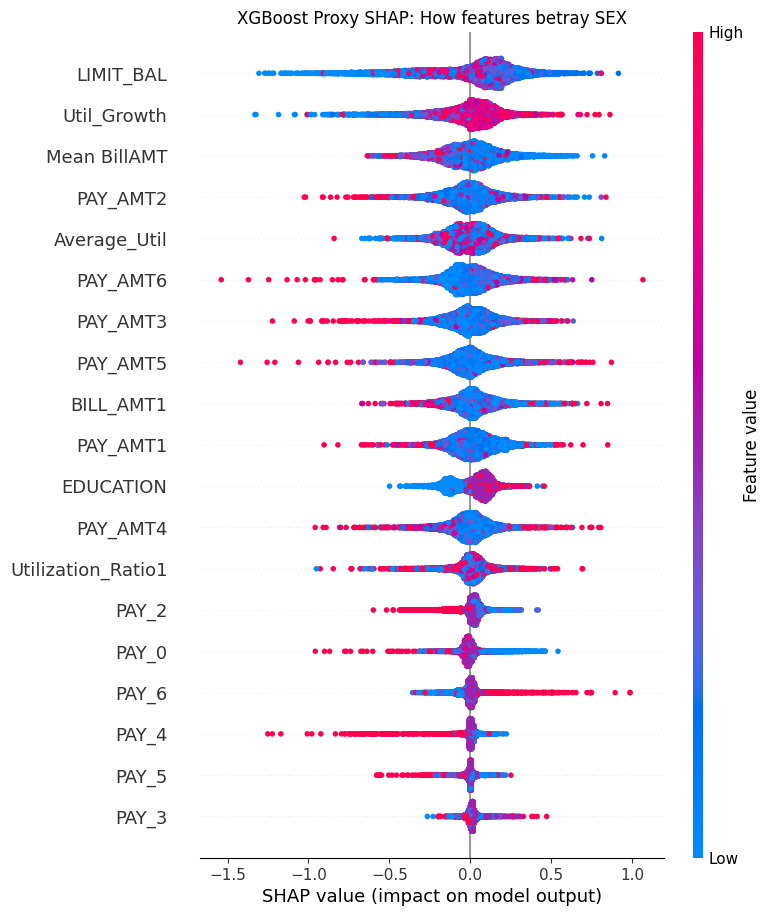

In [ ]:
import shap

# --- STEP 3: SHAP FOR PROXY DETECTION ---
# Using a subset for SHAP to ensure speed and stability
explainer = shap.TreeExplainer(xgb_proxy_sex)
shap_values = explainer.shap_values(X_test_p)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_p, show=False)
plt.title('XGBoost Proxy SHAP: How features betray SEX')
plt.savefig('xgb_proxy_shap.png')

In [ ]:
# Calculate the average impact of each feature on the SEX prediction
proxy_impact = pd.DataFrame({
    'Feature': X_test_p.columns,
    'Mean_Abs_SHAP': np.abs(shap_values).mean(axis=0)
}).sort_values(by='Mean_Abs_SHAP', ascending=False)

print("--- Top SEX Proxies (XGB) ---")
print(proxy_impact.head(3))

--- Top SEX Proxies (XGB) ---
         Feature  Mean_Abs_SHAP
0      LIMIT_BAL       0.219166
18   Util_Growth       0.129005
16  Mean BillAMT       0.122175


##Conclusion

What is most interesting about SEX feature is that the DIR Ratio is greater than 1 suggesting that loans are actually *in favour* of Women than they are of Men. This is also clearly evident in the dataset where more women were approved loans than men in the year 2005 in Taiwan. But this is not so statistically significant as it does fall into the Four-Fifths Rule also

We have run the same processes on the Feature SEX to try and figure out if there is any possible feature that is a proxy leak of SEX feature. We have not found any strong proxies. According to both Logistic Regression and XGBoost Models we are unable to find any strong patterns as AUC for both of it is under 0.6, this basically means that this model is little better than randomly guessing the SEX of the data. There might be little but it is not statistically significant

**Final Conclusion**" The audit of the SEX feature reveals a high degree of algorithmic fairness. Both the linear (Logistic) and non-linear (XGBoost) proxy detectors failed to accurately reconstruct gender identity from financial features, yielding AUCs of 0.557 and 0.579 respectively. This lack of a strong proxy signal is reflected in the Disparate Impact Ratios (1.0025 and 1.0036), which demonstrate near-perfect parity in approval rates. While minor 'gendered' signals were detected in Util_Growth and LIMIT_BAL, they were insufficient to create systemic bias. We conclude that for this dataset, removing the protected attribute was an effective strategy for ensuring gender-neutral credit decisions.

In [ ]:
df=df.drop(columns=['is_female'],axis=1)  #dropping is_female from the df dataset so it doesn't affect finding proxies for the MARRIAGE feature

#9. Using SHAP and finding possible proxy for MARRIAGE feature

Preparing throwaway models for calculating AUC and running SHAP

MARRIED feature actually takes 3 values- 1,2,3. We choose to ignore the third value which stands for Other as the number of people who selected it is ~300 only (roughly 1% of the total population). The number is so less we choose to ignore that result.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import shap


df['is_married'] = (df['MARRIAGE'] == 1).astype(int)

#dropping the sensitive columns, the original target and is_married to see if other columns are leaking MARRIED status or not
drop_cols = ['ID', 'AGE', 'SEX', 'MARRIAGE', 'is_married', 'default payment next month']
X_proxy = df.drop(columns=drop_cols)
y_proxy = df['is_married']

# 3. Split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_proxy, y_proxy, test_size=0.3, random_state=41, stratify=y_proxy
)


##Logistic Regression

Calculating DIR for MARRIAGE feature

In [ ]:
import numpy as np

#uisng main model and getting predictions
y_pred_log = model.predict(X_test_scaled)

# Identiyfing the groups using the original 'MARRIAGE' column
# We compare Married (1) against Single (2)
is_married = (a_test['MARRIAGE'].values == 1)
is_single = (a_test['MARRIAGE'].values == 2)

# Calculating Approval Rates (Mean where prediction is 0)
approval_married_log = np.mean(y_pred_log[is_married] == 0)
approval_single_log = np.mean(y_pred_log[is_single] == 0)

# 4. Calculating DIR
# Formula: (Approval Rate of Married) / (Approval Rate of Single)
dir_log_marriage = approval_married_log / approval_single_log

print(f"--- Logistic Regression: MARRIAGE Audit ---")
print(f"Approval Rate (Married): {approval_married_log:.4f}")
print(f"Approval Rate (Single):  {approval_single_log:.4f}")
print(f"Disparate Impact Ratio:  {dir_log_marriage:.4f}")

--- Logistic Regression: MARRIAGE Audit ---
Approval Rate (Married): 0.8817
Approval Rate (Single):  0.8856
Disparate Impact Ratio:  0.9956


Finding AUC

--- MARRIAGE Proxy Audit Results ---
Logistic AUC (Can it guess Marriage?): 0.6273


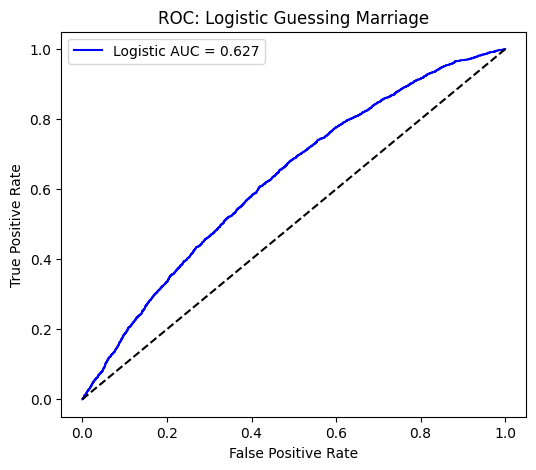

In [ ]:
# Logistic Proxy Detector
scaler = StandardScaler()
X_train_p_scaled = pd.DataFrame(scaler.fit_transform(X_train_p), columns=X_proxy.columns)
X_test_p_scaled = pd.DataFrame(scaler.transform(X_test_p), columns=X_proxy.columns)

log_proxy_marriage = LogisticRegression(max_iter=1000).fit(X_train_p_scaled, y_train_p)
y_probs_log = log_proxy_marriage.predict_proba(X_test_p_scaled)[:, 1]
auc_log = roc_auc_score(y_test_p, log_proxy_marriage.predict_proba(X_test_p_scaled)[:, 1])


print(f"--- MARRIAGE Proxy Audit Results ---")
print(f"Logistic AUC (Can it guess Marriage?): {auc_log:.4f}")

#  Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test_p, y_probs_log)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'Logistic AUC = {auc_log:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC: Logistic Guessing Marriage')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



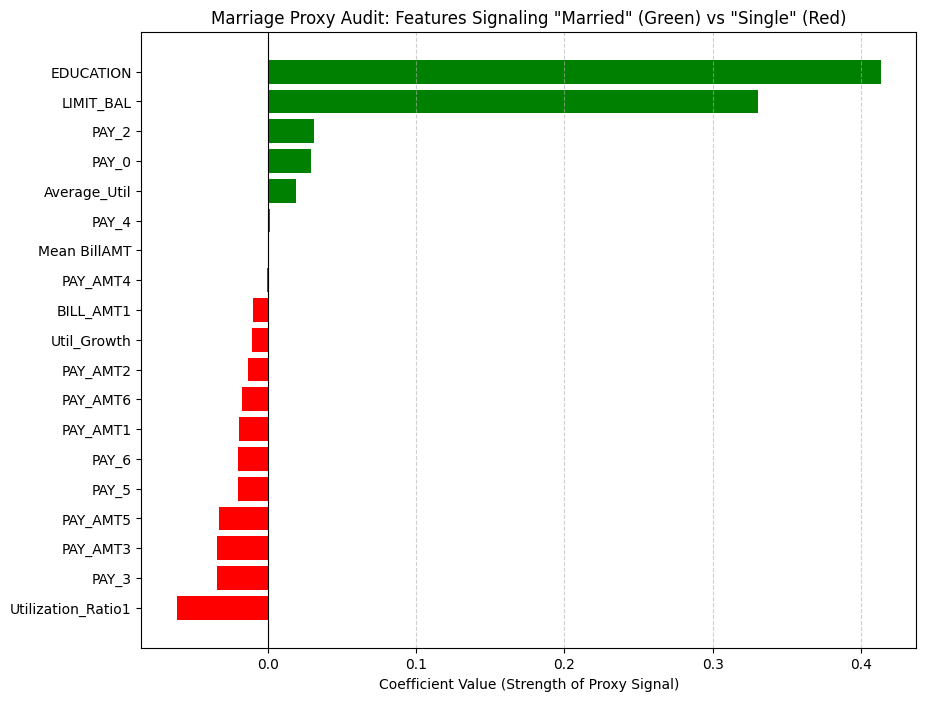

In [ ]:
# 1. Create the Importance DataFrame
coef_df_marriage = pd.DataFrame({
    'Feature': X_proxy.columns,
    'Coef': log_proxy_marriage.coef_[0]
}).sort_values(by='Coef')

# 2. Add Absolute Importance for ranking Top 3 later
coef_df_marriage['Abs_Coef'] = coef_df_marriage['Coef'].abs()

# 3. Create the Visualization
plt.figure(figsize=(10, 8))
# Green for Married (+), Red for Single/Others (-)
colors = ['red' if x < 0 else 'green' for x in coef_df_marriage['Coef']]

plt.barh(coef_df_marriage['Feature'], coef_df_marriage['Coef'], color=colors)

# Add styling for a professional research report
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Marriage Proxy Audit: Features Signaling "Married" (Green) vs "Single" (Red)')
plt.xlabel('Coefficient Value (Strength of Proxy Signal)')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Save the figure
plt.savefig('logistic_marriage_proxies.png', bbox_inches='tight')
plt.show()


In [ ]:

# 4. Identify the Top 3 "Marriage Leaks"
top_3_marriage = coef_df_marriage.sort_values(by='Abs_Coef', ascending=False).head(3)
print("\n--- Top 3 Linear Marriage Proxies ---")
print(top_3_marriage[['Feature', 'Coef']])


--- Top 3 Linear Marriage Proxies ---
               Feature      Coef
1            EDUCATION  0.413697
0            LIMIT_BAL  0.330505
15  Utilization_Ratio1 -0.061777


##XGB Classifier

Calculating DIR

In [ ]:
# Getting predictions for XGBoost
y_pred_xgb = XGB_model.predict(X_test_scaled)

# Identifying the groups
is_married = (a_test['MARRIAGE'].values == 1)
is_single = (a_test['MARRIAGE'].values == 2)

# Calculating Approval Rates
approval_married_xgb = np.mean(y_pred_xgb[is_married] == 0)
approval_single_xgb = np.mean(y_pred_xgb[is_single] == 0)

# Calculating DIR
dir_xgb_marriage = approval_married_xgb / approval_single_xgb

print(f"--- XGBoost Classifier: MARRIAGE Audit ---")
print(f"Approval Rate (Married): {approval_married_xgb:.4f}")
print(f"Approval Rate (Single):  {approval_single_xgb:.4f}")
print(f"Disparate Impact Ratio:  {dir_xgb_marriage:.4f}")

--- XGBoost Classifier: MARRIAGE Audit ---
Approval Rate (Married): 0.8824
Approval Rate (Single):  0.8873
Disparate Impact Ratio:  0.9945


Calculating AUC and running SHAP

--- SEX Proxy Audit Results ---
XGBoost AUC  (Can it guess Marriage Status?): 0.6105


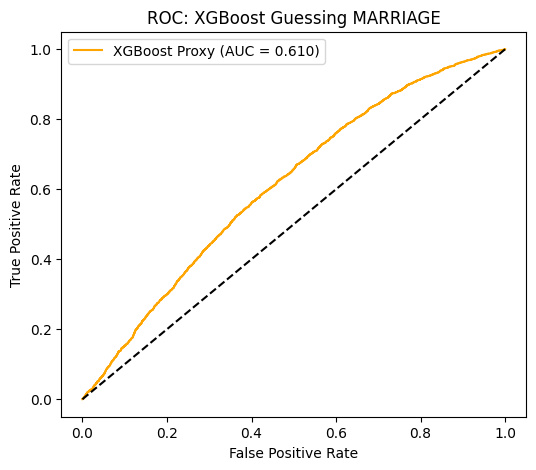

In [ ]:
xgb_proxy_marriage = XGBClassifier(random_state=41).fit(X_train_p, y_train_p)
auc_xgb = roc_auc_score(y_test_p, xgb_proxy_marriage.predict_proba(X_test_p)[:, 1])

print(f"--- SEX Proxy Audit Results ---")
print(f"XGBoost AUC  (Can it guess Marriage Status?): {auc_xgb:.4f}")


# --- STEP 2: PLOTTING ROC CURVE ---
fpr_x, tpr_x, _ = roc_curve(y_test_p, xgb_proxy_marriage.predict_proba(X_test_p)[:, 1])
plt.figure(figsize=(6, 5))
plt.plot(fpr_x, tpr_x, color='orange', label=f'XGBoost Proxy (AUC = {auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC: XGBoost Guessing MARRIAGE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('xgb_proxy_roc.png')


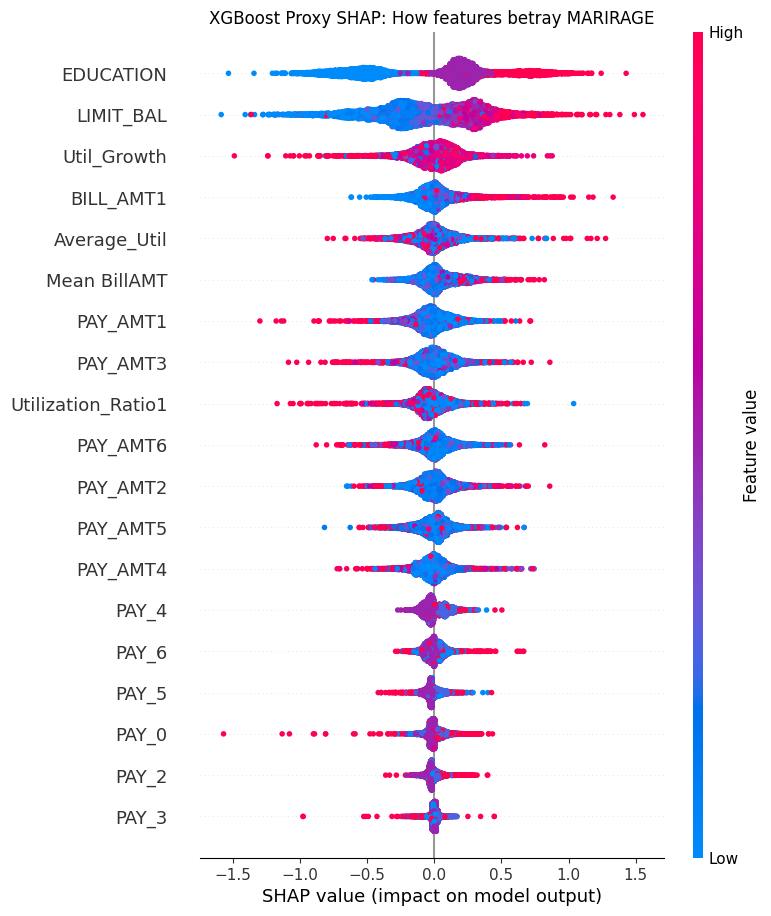

In [ ]:
import shap

# --- STEP 3: SHAP FOR PROXY DETECTION ---
# Using a subset for SHAP to ensure speed and stability
explainer = shap.TreeExplainer(xgb_proxy_marriage)
shap_values = explainer.shap_values(X_test_p)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_p, show=False)
plt.title('XGBoost Proxy SHAP: How features betray MARIRAGE')
plt.savefig('xgb_proxy_shap.png')

In [ ]:
# Calculate the average impact of each feature on the Age prediction
proxy_impact = pd.DataFrame({
    'Feature': X_test_p.columns,
    'Mean_Abs_SHAP': np.abs(shap_values).mean(axis=0)
}).sort_values(by='Mean_Abs_SHAP', ascending=False)

print("--- Top Age Proxies (XGB) ---")
print(proxy_impact.head(3))

--- Top Age Proxies (XGB) ---
        Feature  Mean_Abs_SHAP
1     EDUCATION       0.411355
0     LIMIT_BAL       0.302335
18  Util_Growth       0.120805


##Conclusion

After running the same tests and protecting the feature MARRIAGE we get some interesting results.

There is moderate bias. The bias is definitely more present than it was in the case of SEX. However it is still not evident as the AUC is stil just over 0.6.

Interestingly, the linear model (Logistic Regression) outperformed the non-linear model (XGBoost) in detecting marriage. This suggests that the signal for marital status is primarily correlation-based rather than hidden in complex, multi-dimensional habits.

Comparing the DIR of both, we find both of them to be satisfying the Four-Fifths Rule, and we also find that the Linear Model is outperforming the XGB Classifier, which suggests that for the case of MARRIAGE feature, the dataset is following a pattern closer to the linear trend.

The features that were contributing to this Proxy Leaking of the MARRIAGE feature includies **EDUCATION**, **LIMIT_BAL** and **BILL_AMT1** in the XGB Classifier mdoel and for the case of Logistic Regression, **Utilization_Ratio1** replaces UTIL_GROWTH.

#10. CONCLUSION

This project aims to reveal the inherent proxy bias behind most data. Here just by employing simple methods of data cleaning and processing, and by choosing appropriate models, we have found out which columns are leaking valuable information about which Feature and how much is each feature contributing to the leak.

##Comparing Leakages

###**Area Under Curve (AUC)**

This research has proved that different columns will be leaked in different amounts. For instance, the SEX feature was not leaked as much as AGE feature. AGE was found to be the most vulnerable feature whereas SEX was found least.

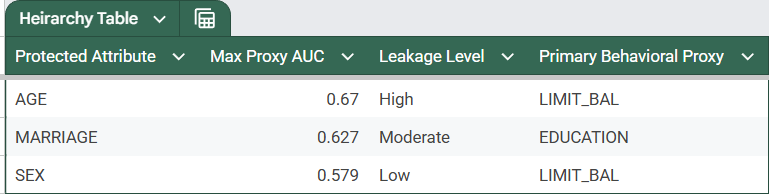

There is a direct correlation between "Life Stage" and financial behavior. Age and Marriage are easier for algorithms to reconstruct because they are structurally tied to career progression and household stability.

###**Disparate Impact Ratio (DIR)**

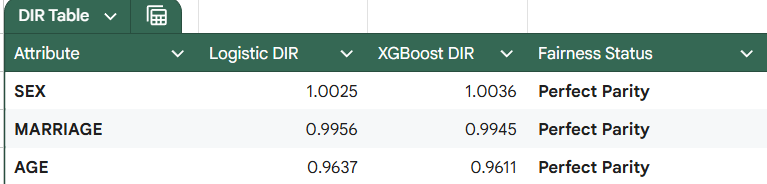

##Final Verdict and Academic Contribution

This research proves that "Fairness by Oblivion" (simply deleting columns) works effectively for Gender and Marital Status in the 2005 UCI Credit dataset. However, it reveals a significant Proxy Vulnerability regarding Age.


**Linear vs. Non-Linear**: The XGBoost model generally found slightly stronger or more complex proxies than Logistic Regression, suggesting that as models become more complex, the risk of sneaky proxy discrimination increases.



**The Age Paradox**: Because Age is the most vulnerable feature (AUC 0.67), it remains the primary vector through which unintended bias could enter the system. If the DIR for Age is significantly lower than 1.0, it confirms that the model is penalizing younger borrowers not for their age, but for the repayment immaturity that acts as its proxy.



**Final Statement**: While the model is *mathematically fair* regarding Gender and Marriage, the high proxy leakage of Age suggests that true "Blindness" requires more than just column deletion; it requires feature de-biasing to ensure that behavioral patterns like LIMIT_BAL do not become a backdoor for age-based discrimination.

Next step of this project would be to ***mitigate*** this bias by employing different methods

##Fairness Dashboard

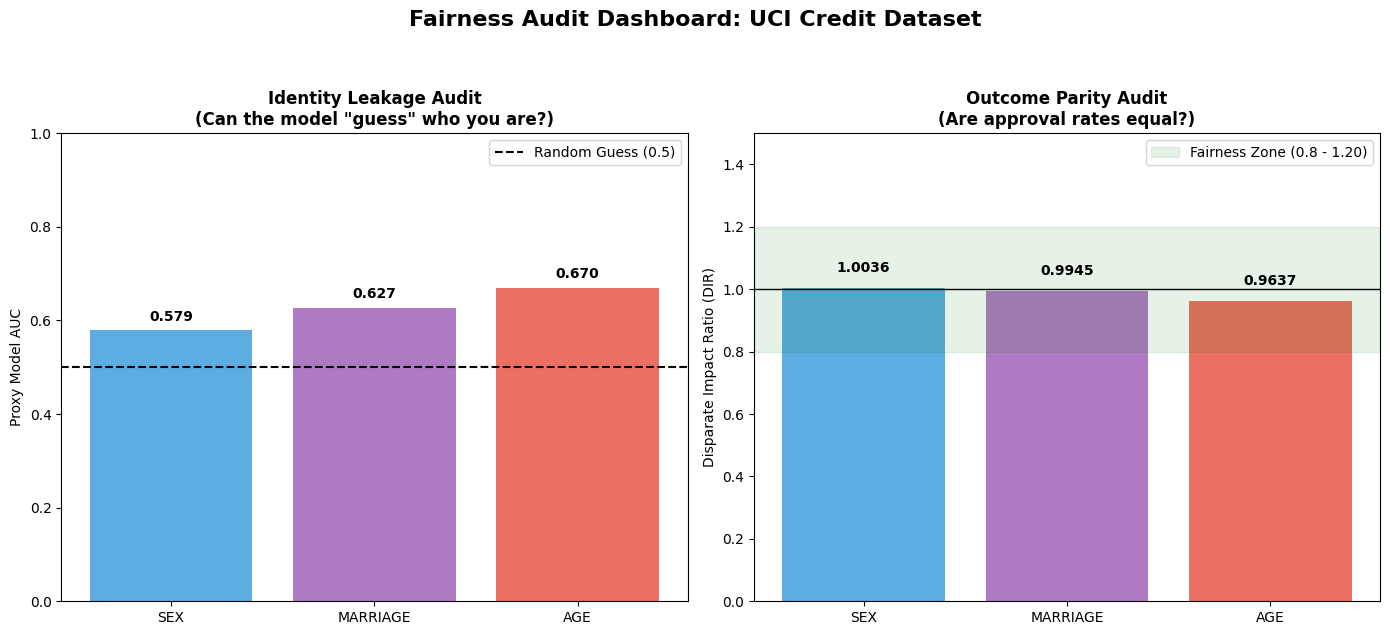

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. DATA ENTRY (Based on your Audit results) ---
attributes = ['SEX', 'MARRIAGE', 'AGE']

# Proxy AUCs (The "Leakage")
# Using your highest found AUCs (typically from XGBoost)
auc_scores = [0.579, 0.627, 0.670]

# DIRs (The "Parity") - Based on your finding that all are near 1.0
dir_scores = [1.0036, 0.9945, 0.9637]

# --- 2. SETUP PLOT ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
plt.subplots_adjust(wspace=0.3)

# --- 3. PLOT 1: PROXY LEAKAGE (AUC) ---
bars1 = ax1.bar(attributes, auc_scores, color=['#3498db', '#9b59b6', '#e74c3c'], alpha=0.8)
ax1.axhline(0.5, color='black', linestyle='--', label='Random Guess (0.5)')
ax1.set_ylim(0, 1.0)
ax1.set_title('Identity Leakage Audit\n(Can the model "guess" who you are?)', fontweight='bold')
ax1.set_ylabel('Proxy Model AUC')
ax1.legend()

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02, f'{height:.3f}', ha='center', fontweight='bold')

# --- 4. PLOT 2: OUTCOME PARITY (DIR) ---
bars2 = ax2.bar(attributes, dir_scores, color=['#3498db', '#9b59b6', '#e74c3c'], alpha=0.8)
ax2.axhline(1.0, color='black', linestyle='-', linewidth=1)
ax2.axhspan(0.8, 1.20, color='green', alpha=0.1, label='Fairness Zone (0.8 - 1.20)') # 4/5ths Rule
ax2.set_ylim(0, 1.5)
ax2.set_title('Outcome Parity Audit\n(Are approval rates equal?)', fontweight='bold')
ax2.set_ylabel('Disparate Impact Ratio (DIR)')
ax2.legend()

# Add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05, f'{height:.4f}', ha='center', fontweight='bold')

# Final formatting
plt.suptitle('Fairness Audit Dashboard: UCI Credit Dataset', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('final_fairness_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()